# 0. Import Library

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings
import plotly.express as px
import plotly.graph_objects as go

sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('data/FT1000_v1.csv')
df.head()

,Rank,Name,Ranked2021,Ranked2020,Country,Sector,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear,Country1,Sector1
0,1,Swappie,No,No,Finland,Technology,477.43,97611814,507000,218,1,2016,Finland,Technology
1,2,Kilo Health,No,No,Lithuania,Health,450.05,57318766,344428,177,10,2013,Lithuania,Health
2,3,OCI,No,No,UK,Financial Services,409.59,568322073,4325512,32,4,2012,UK,Financial Services
3,4,OnlyFans,No,No,UK,Technology,393.63,316732986,2652185,800,4,2016,UK,Technology
4,5,Enpal,No,No,Germany,Energy,386.88,56109613,486165,365,9,2017,Germany,Energy


# 4. Data Analyzing
## 4.1. Câu hỏi 1 
**Câu hỏi:** Lĩnh vực có tốc độ tăng trưởng nhanh nhất ở các nước

**Ý nghĩa:** Biết được lĩnh vực có tốc độ tăng trưởng nhanh ở từng nước, các stakeholder (có thể là chính phủ các nước, EU,...) sẽ có chính sách phù hợp để phân bổ nhân lực, vật lực phù hợp để tiếp tục đẩy mạnh phát triển lĩnh vực đó

In [23]:
data = df[['Country', 'Sector', 'CAGR']].groupby(['Country', 'Sector']).sum().reset_index().sort_values(by=['CAGR'], ascending=False)
data.drop_duplicates(subset = ['Country'], keep = 'first', inplace = True)

In [24]:
fig = px.choropleth(
    data_frame = data, locations = 'Country', locationmode = 'country names', color = 'Sector', 
    color_discrete_sequence=px.colors.qualitative.Bold, width = 800, height = 600)
    
fig.update_layout(
    title = 'Sector with highest CAGR sum by Country',
    title_x = 0.5,
    legend = dict(
        # orientation = 'h', x = 1, y = 1, xanchor = 'right', yanchor = 'top',
    ), 
    margin = {'t': 30, 'b': 0, 'l': 0, 'r': 0},
    geo = go.layout.Geo(
        projection = go.layout.geo.Projection(scale = 1.5),
        scope = 'europe',
    )
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Đa số các nước có tổng CAGR cao nhất ở lĩnh vực Technology (Công nghệ), một số lĩnh vực khác chiếm lĩnh vị trí CAGR cao nhất ở một vài nước là Energy (Năng lượng), Health (Sức khỏe). 

## 4.2. Câu hỏi 2
**Câu hỏi**: Quốc gia nào có tốc độ tăng trưởng cao ở nhiều lĩnh vực

In [ ]:
data = df[['Country', 'Sector']].value_counts().reset_index()[['Country', 'Sector']].groupby('Country').count().reset_index()

fig = px.choropleth(
    data_frame = data, locations = 'Country', locationmode = 'country names', color = 'Sector', 
    color_discrete_sequence=px.colors.qualitative.Bold, width = 800, height = 600)
    
fig.update_layout(
    title = 'Sector count by Country',
    title_x = 0.5,
    legend = dict(
        # orientation = 'h', x = 1, y = 1, xanchor = 'right', yanchor = 'top',
    ), 
    margin = {'t': 30, 'b': 0, 'l': 0, 'r': 0},
    geo = go.layout.Geo(
        projection = go.layout.geo.Projection(scale = 1.5),
        scope = 'europe',
    )
)
fig.show()

## 4.4. Câu hỏi 4
**Câu hỏi**: So sánh mức độ tăng trưởng và doanh thu của các công ty có từ 5 nhân viên trở xuống so với các công ty có hơn 5 nhân viên ở năm 2017

**Ý nghĩa**: Cũng tương tự các câu hỏi trên, các công ty có từ 5 nhân viên trở xuống ở năm 2017 nhưng được xếp hạng vào FT1000 phần nào đó chứng tỏ tiềm năng phát triển tốt hơn nữa trong tương lai. Tuy nhiên ta cần so sánh về doanh thu cũng như mức độ tăng trưởng của 2 nhóm để có thể đưa ra quyết định đầu tư đúng dắn hơn

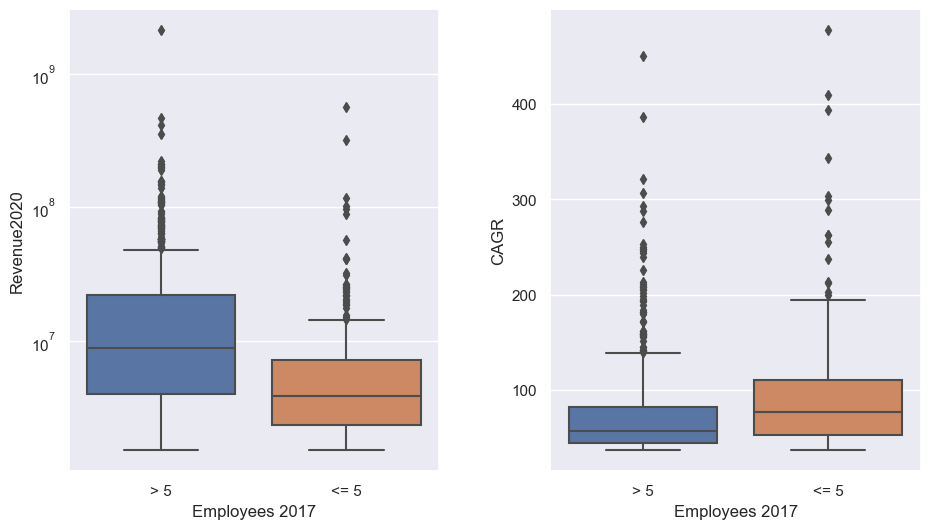

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize = (11, 6))
fig.subplots_adjust(wspace = 0.3)

sns.boxplot(
    x = df['Employees2017'] <= 5,
    y = df['Revenue2020'], 
    ax = axes[0]
)

sns.boxplot(
    x = df['Employees2017'] <= 5,
    y = df['CAGR'],
    ax = axes[1],
)

axes[0].set_xlabel('Employees 2017')
axes[1].set_xlabel('Employees 2017')
axes[0].set_xticklabels(['> 5', '<= 5'])
axes[1].set_xticklabels(['> 5', '<= 5'])
axes[0].set_yscale('log')